# Manifold learning
Manifold learning（流形学习）是一种高级的机器学习技术，主要用于非线性降维。其核心思想是识别和利用数据中潜在的低维结构，这种结构被认为是嵌入在高维空间中的流形（manifold）。

Manifold learning通过探索数据的内在几何和拓扑结构，揭示数据之间复杂的关系。适用于多种类型的数据的降维，尤其是那些线性方法难以处理的复杂数据集。

常用的Manifold learning方法有：LLE（Local Linear Embedding）和 t-SNE（t-Distributed Stochastic Neighbor Embedding）

## LLE（Local Linear Embedding）
LLE的工作原理可以分为三个主要步骤：

1. 邻域选择：对于每个数据点，LLE首先找到其在高维空间中的最近邻。这些邻域可以通过固定的“邻域大小”（即固定数量的最近邻）或固定的“半径”（即距离范围内的所有邻居）来确定。  
<br>

2. 局部重建权重计算：**LLE的核心假设是每个数据点都可以由其邻域内的其他点的线性组合来近似表示**。因此，算法计算一组权重，这些权重最好地重建每个点作为其邻居的线性组合。具体地，LLE最小化每个点和它的重建之间的均方差，以找到最佳的重建权重。  
<br>

3. 嵌入到低维空间：在获得重建权重之后，LLE将数据映射到低维空间，同时尽量保持原有的重建权重。这意味着每个点在低维空间中的位置是由它在高维空间中的邻居的位置决定的。通过最小化重建误差，LLE寻找一个低维表示，其中每个点仍然尽可能接近于其高维邻居的线性组合。

优点：与其他降维方法相比，LLE不需要过多的参数调整。最主要的参数是邻域的大小。

缺点：LLE对邻域大小的选择相对敏感，不同的选择可能导致完全不同的降维结果。并且LLE有时可能陷入局部最优解，特别是在降维到非常低的维度时。

## t-SNE（t-Distributed Stochastic Neighbor Embedding）
t-SNE的工作原理可以分为三个主要步骤：
1. 高维空间中的相似性：t-SNE首先在高维空间中计算每一对数据点之间的相似性。这种相似性通常通过高斯分布（正态分布）来建模，并且是基于欧几里得距离的。对于每一个点$x_i$，我们计算它和其他所有点$x_j$之间的条件概率$P_{j|i}$，这个概率反映了点$x_j$被选择为$x_i$的邻居的可能性。
<br>

2. 低维空间中的相似性：然后，t-SNE在低维空间中为每个数据点创建一个对应点，并计算低维空间中点之间的相似性。在低维空间中，相似性通过t分布来计算，这有助于解决高维空间中的“拥挤问题”（crowding problem）。
<br>

3. 最小化Kullback-Leibler（KL）散度：t-SNE的目标是使高维空间和低维空间中的相似性尽可能接近。这通过最小化KL散度来实现，KL散度是一种度量两个概率分布差异的方法。通过优化过程，t-SNE调整低维空间中的点，使得KL散度最小化。

优点：**t-SNE通常会在低维表示中形成不同的簇，这些簇可以揭示数据中的固有分组**。因此在大多数真实数据中，t_SNE的表现是最好的。

缺点：t-SNE对邻域大小(参数名为“困惑度”)的选择非常敏感，它会直接影响局部与全局结构的平衡。

# 官方示例
## 示例1：Swiss Roll

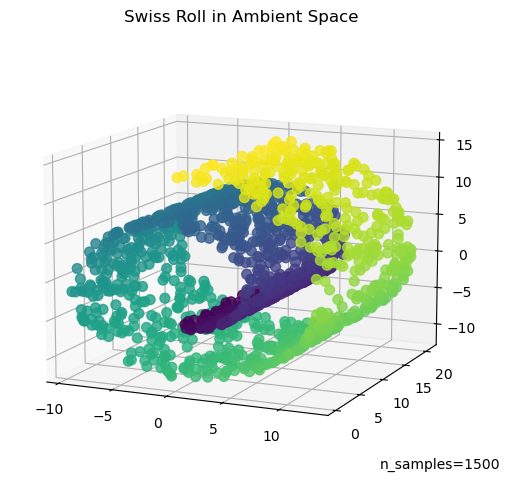

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

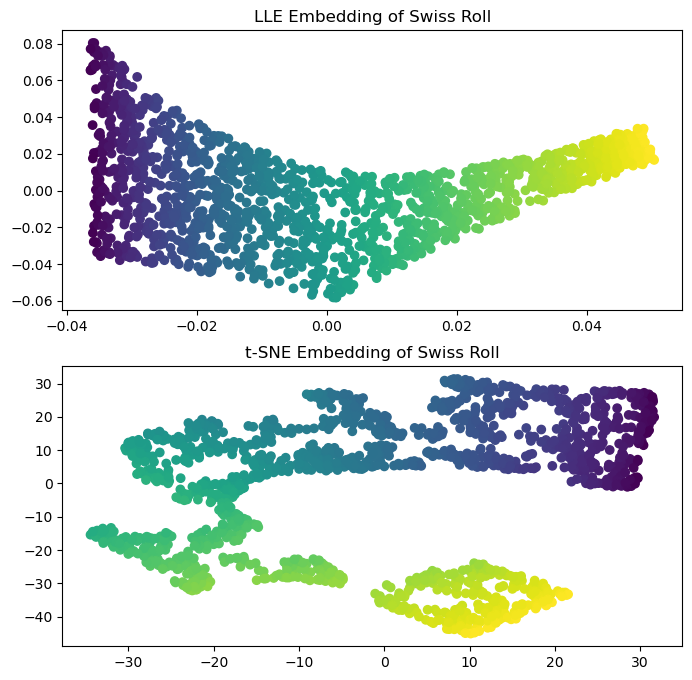

In [2]:
sr_lle, sr_err = manifold.locally_linear_embedding(
    sr_points, n_neighbors=12, n_components=2
)

sr_tsne = manifold.TSNE(n_components=2, perplexity=40, random_state=0).fit_transform(
    sr_points
)

fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
axs[0].scatter(sr_lle[:, 0], sr_lle[:, 1], c=sr_color)
axs[0].set_title("LLE Embedding of Swiss Roll")
axs[1].scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=sr_color)
_ = axs[1].set_title("t-SNE Embedding of Swiss Roll")

## 示例2：Swiss Hole

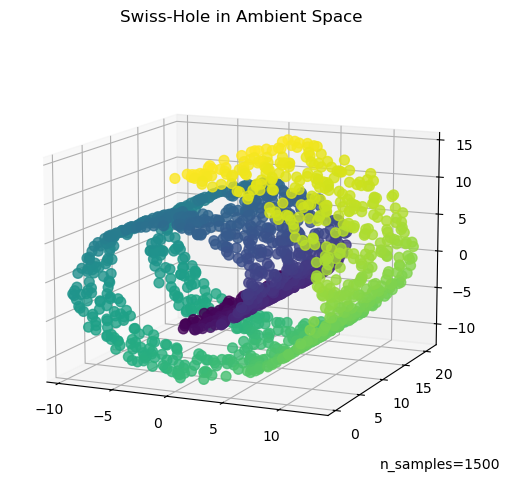

In [3]:
sh_points, sh_color = datasets.make_swiss_roll(
    n_samples=1500, hole=True, random_state=0
)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sh_points[:, 0], sh_points[:, 1], sh_points[:, 2], c=sh_color, s=50, alpha=0.8
)
ax.set_title("Swiss-Hole in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

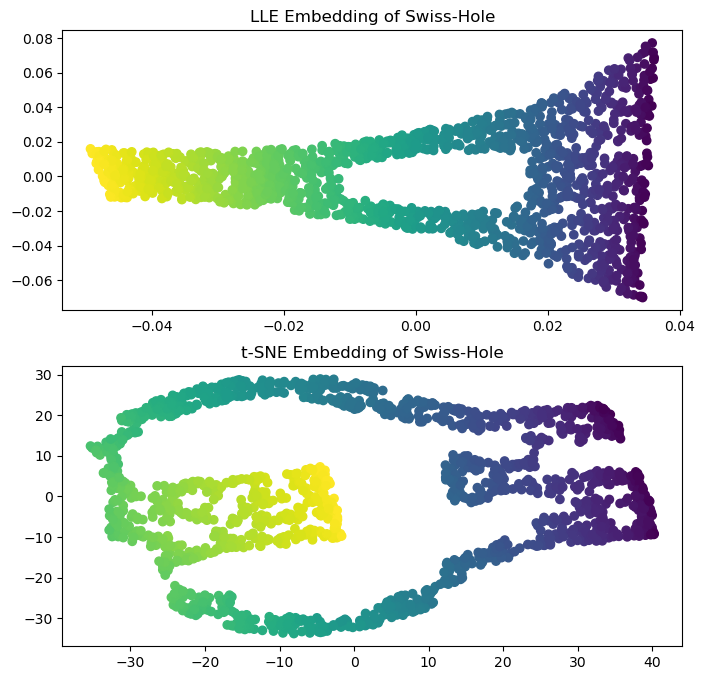

In [4]:
sh_lle, sh_err = manifold.locally_linear_embedding(
    sh_points, n_neighbors=12, n_components=2
)

sh_tsne = manifold.TSNE(
    n_components=2, perplexity=40, init="random", random_state=0
).fit_transform(sh_points)

fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
axs[0].scatter(sh_lle[:, 0], sh_lle[:, 1], c=sh_color)
axs[0].set_title("LLE Embedding of Swiss-Hole")
axs[1].scatter(sh_tsne[:, 0], sh_tsne[:, 1], c=sh_color)
_ = axs[1].set_title("t-SNE Embedding of Swiss-Hole")